In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [5]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Print the scikit-learn version
import sklearn
sklearn.__version__

'0.21.3'

### Generating the data for KNN
- Generate a values for class 0
   - Generate 50, x1 values within the range 0 to 50
   - Generate 50, x2 values within range 1 to 50
   - create a 2d array with x1 values as 0th element and x2 values as 1st element,3rd value is zero
   - o/p: -- [[2,5,0],[3,10,0],[24,12,0]]
- Generate values for class 1
   - Generate 50, x1 values within the range 50 to 100
   - Generate 50, x1 values within the range 1 to 50
   -  create a 2d array with x1 values as 0th element and x2 values as 1st element,3rd value is one
- Create a 2d Array which consists both classes data
- Create a DataFrame from this data with added y column

In [17]:
np.random.seed(10)
x1= np.random.randint(0,50,50)
x2= np.random.randint(1,50,50)
x1,x2

(array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
        16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
        22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11]),
 array([29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21,
        33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22,
        43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41]))

In [19]:
np.hstack((x1,x2))  # 1d array

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11, 29,
       11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21, 33,
       25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22, 43,
       23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41])

In [18]:
np.vstack((x1,x2))  #2d array

array([[ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40,
        36, 16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25,
        13, 28, 22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23,
        30, 11],
       [29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34,
        21, 33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,
         7, 22, 43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34,
        46, 41]])

In [23]:
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.zeros(50,dtype=int),1)

In [27]:
d0=np.hstack((x1_2d,x2_2d,y_2d))
d0

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [29]:
np.random.seed(15)
x1= np.random.randint(50,100,50)
x2= np.random.randint(1,50,50)
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.zeros(50,dtype=int),1)
d1=np.hstack((x1_2d,x2_2d,y_2d))
d1

array([[58,  3,  0],
       [62, 43,  0],
       [55, 33,  0],
       [50, 38,  0],
       [78,  8,  0],
       [77, 25,  0],
       [57, 38,  0],
       [61, 46,  0],
       [71, 20,  0],
       [97, 49,  0],
       [79, 41,  0],
       [67, 30,  0],
       [95, 13,  0],
       [81, 25,  0],
       [73, 47,  0],
       [82, 13,  0],
       [60, 34,  0],
       [65,  3,  0],
       [54, 25,  0],
       [91, 45,  0],
       [89, 43,  0],
       [87, 18,  0],
       [69, 24,  0],
       [94, 30,  0],
       [63, 35,  0],
       [79, 24,  0],
       [65, 19,  0],
       [88, 27,  0],
       [65, 27,  0],
       [99, 17,  0],
       [51, 14,  0],
       [81, 27,  0],
       [82, 33,  0],
       [71,  7,  0],
       [76,  5,  0],
       [84, 29,  0],
       [61, 21,  0],
       [51, 36,  0],
       [90, 40,  0],
       [56, 29,  0],
       [91,  6,  0],
       [84,  1,  0],
       [90, 10,  0],
       [72, 49,  0],
       [90, 21,  0],
       [65, 47,  0],
       [78, 39,  0],
       [85, 3

In [31]:
data = np.vstack((d0,d1))
data



array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [32]:
df= pd.DataFrame(data,columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


In [92]:
df.to_csv("knn.csv")

### Scatter plot for the Randomly generated data classwise

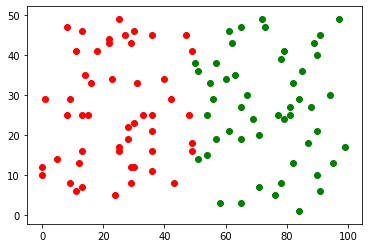

In [74]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')

In [35]:
df['x2'][:50]

0     29
1     11
2     25
3     10
4     16
5     19
6     17
7      8
8     25
9     12
10    18
11    47
12     8
13    12
14    29
15    34
16    21
17    33
18    25
19    45
20     6
21     5
22     8
23    25
24    25
25    45
26    35
27    41
28    16
29    14
30    25
31    16
32     7
33    22
34    43
35    23
36    12
37    49
38    13
39    29
40    33
41    16
42    45
43    41
44    43
45    46
46    44
47    34
48    46
49    41
Name: x2, dtype: int32

Separate the features and outcomes

In [37]:
outcome = df['y']
feature= df[['x1','x2']]
# features = df.drop('y'axis=1)
outcome[0],feature.iloc[0]

(0, x1     9
 x2    29
 Name: 0, dtype: int32)

In [39]:
import math
def Eucledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
Eucledian_distance((4,3),(0,0))

5.0

In [85]:
def Knearest_points(p,d,k):
    ''' p- new data points
    d - all the features as numpy array
    k - no of neighbours
    returns the k nearest neighbors'''
    # create an empty list to store distance
    distances =[]
    for row in d:
        distances.append(Eucledian_distance(row,p))
        # Convert the list to numpy array
    distances=np.array(distances)
    # sort the numpy array get the indices based on sorted values
    # use the indices to get the k nearest neighbors
    return distances.argsort()[:k]

In [70]:
l = [45,67,45,78,43]
l=np.array(l)
l.argsort()

array([4, 0, 2, 1, 3], dtype=int64)

In [71]:
for row in features.values:
    print(row)
    break

[ 9 29]


In [82]:
 near_4=Knearest_points((5,34),features.values,4)
near_4[:,0]

array([ 9,  1, 14, 11])

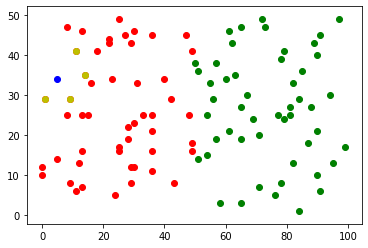

In [83]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')
plt.plot(5,34,'bo')
plt.scatter (near_4[:,0],near_4[:,1],color='y')

In [88]:
ind = Knearest_points((47,25),features.values,10)
features.values[ind]
outcome[ind]
outcome[ind].value_counts()
outcome[ind].value_counts().index[0]


0

In [89]:
def output(p,k,features,outcome):
    ind=Knearest_points(p,features.values,k)
    
    return outcome[ind].value_counts().index[0]
output((34,49),10,features,outcome)

0

In [91]:
for i,feature in features.iterrows():
    print(feature)
    break

x1     9
x2    29
Name: 0, dtype: int32


### KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/knn.csv')
data.head(4)

,Unnamed: 0,x1,x2,y
0,0,9,29,0
1,1,36,11,0
2,2,15,25,0
3,3,0,10,0


In [2]:
data.drop("Unnamed: 0",axis=1,inplace=True)


In [3]:
data.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


In [4]:
# Seperate features and target
features = data[['x1','x2']]
target=data['y']

In [5]:
target.value_counts()

1    50
0    50
Name: y, dtype: int64

### KNN Classifier
- Fit --> Store the features and target
- Predict
  - Prediction multiple points
  - Run a loop for point
     - calculate the nearest neighbors indices
     - get the outcomes of the nearest neighbors
     - predict the output based on neighbors class

In [23]:
#def fit(features,target):
    #return features,target

In [6]:
class knn():
    def __init__(self,distance='L2',k = 5):
        self.distance = distance
        self.k=k
    def fit(self,features,target):
        self.features = features
        self.target = target
    def eucledian_distance(self,p1,p2):
        return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    def manhattan_distance(self,p1,p2):
        return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])
    def nearest_neighbors_indices(self,p):
        if self.distance=='L1':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.manhattan_distance(p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        elif self.distance=='L2':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.eucledian_distance(p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        
    def predict(self,test):
        # test - data observations to predict outcomes
        # test is a DataFrame
        outputs =[]
        for _,feature in test.iterrows():
            ind = self.nearest_neighbors_indices(feature)
            outputs.append(self.target[ind]. value_counts().index[0])
        return outputs

In [7]:
test = pd.DataFrame(np.array([[23,49],[34,43],[12,27],[60,10]]))

In [8]:
obj = knn()
obj.fit(features,target)
obj.predict(test)

[0, 0, 0, 1]

In [9]:
pred = np.array(obj.predict(features))

In [10]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
features.iloc[5,:]

x1    28
x2    19
Name: 5, dtype: int64

In [12]:
test

,0,1
0,23,49
1,34,43
2,12,27
3,60,10


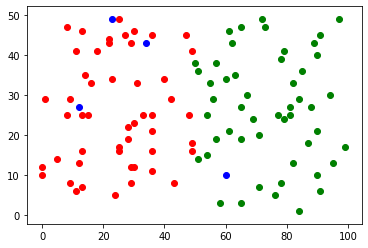

In [13]:
plt.scatter(features['x1'][:50],features['x2'][:50],
            color = 'r')
plt.scatter(features['x1'][50:],features['x2'][50:],
            color = 'g')
plt.scatter(test[0],test[1],color='b')

In [14]:
from sklearn.neighbors import KNeighborsClassifier
obj1 = KNeighborsClassifier()
obj1.fit(features,target)
obj1.predict(test)

array([0, 0, 0, 1], dtype=int64)

In [15]:
obj1.predict(features)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
np.array(target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
def accuracy(y,y_pred):
    # Both y and y_pred are numpy arrays
    return round((y==y_pred).sum() / (y.shape[0])*100,2)

In [27]:
accuracy(np.array([1,1,0]),np.array([0,1,0]))

66.67

In [28]:
accuracy(obj1.predict(features),np.array(target))

98.0

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(obj1.predict(features),target)

0.98

Apply scaling for the features and predict the acccuracy

In [32]:
# import the minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# Create an instance for the MinMaxscaler class 
sc = MinMaxScaler()
# Fit the scaler with the data
sc.fit(features)
features_sc=pd.DataFrame(sc.transform(features),columns = features.columns)

In [33]:
features_sc

,x1,x2
0,0.090909,0.583333
1,0.363636,0.208333
2,0.151515,0.500000
3,0.000000,0.187500
4,0.494949,0.312500
...,...,...
95,0.656566,0.958333
96,0.787879,0.791667
97,0.858586,0.729167
98,0.545455,0.291667


In [34]:
features_sc.describe()

,x1,x2
count,100.000000,100.000000
mean,0.495556,0.524792
std,0.285706,0.281130
min,0.000000,0.000000
25%,0.252525,0.307292
50%,0.500000,0.500000
75%,0.744949,0.770833
max,1.000000,1.000000


In [35]:
# import the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# create an instance
knc = KNeighborsClassifier()
# train the model using fit 
# both features and target as input
knc.fit(features_sc,target)
# predict the values for features
knc.predict(features_sc)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [36]:
accuracy_score(target,knc.predict(features_sc))

0.97

In [37]:
test

,0,1
0,23,49
1,34,43
2,12,27
3,60,10


In [38]:
knc.predict(test)

array([1, 1, 1, 1], dtype=int64)

In [39]:
knc.predict(sc.transform(test))

array([0, 0, 0, 1], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,target,random_state=33)

In [42]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


In [55]:
# Train the KNN with X_train,Y_train
knc1 =KNeighborsClassifier()
knc1.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
# predict the output for X_test store it in variable Y_pred
y_pred  = knc1.predict(X_test)
# calculate the accuracy for y_pred,y_test
accuracy_score(y_pred,Y_test)

1.0

In [57]:
# predict the output for X_test store it in variable Y_out
y_out = knc1.predict(X_train)
# calculate the accuracy for Y_out,Y_train
accuracy_score(y_out,Y_train)


0.96